In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\sanch\Documents\CareerFoundry\Achievement 6'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '1. Data', 'New_Student_Rolls.csv'))

In [5]:
df.columns

Index(['School ID', 'School Name', 'Year', 'School Decile', 'School Type',
       'School Authority', 'School Gender', 'Regional Council', 'Total Roll',
       'Māori', 'Pacific', 'Asian', 'MELAA', 'Other', 'European/ Pākehā',
       'International Fee Paying', 'All Funded', 'Alternative Education',
       'International Fee Paying.1', 'Secondary-Tertiary Programme',
       'Immersion Level 1', 'Immersion Level 2', 'Immersion Level 3',
       'Immersion Level 4A', 'Immersion Level 4B', 'Immersion Level 5',
       'Immersion Taha Māori', 'Immersion None', 'Decile Band',
       'High Immersion %', 'None Immersion %'],
      dtype='object')

In [6]:
df.head(20)

,School ID,School Name,Year,School Decile,School Type,School Authority,School Gender,Regional Council,Total Roll,Māori,...,Immersion Level 2,Immersion Level 3,Immersion Level 4A,Immersion Level 4B,Immersion Level 5,Immersion Taha Māori,Immersion None,Decile Band,High Immersion %,None Immersion %
0,1,Te Kura o Te Kao,2010,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,27,27,...,0,0,10,17,0,0,0,Low decile,0.0,0.0
1,1,Te Kura o Te Kao,2011,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,30,30,...,0,0,30,0,0,0,0,Low decile,0.0,0.0
2,1,Te Kura o Te Kao,2012,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,26,26,...,0,26,0,0,0,0,0,Low decile,0.0,0.0
3,1,Te Kura o Te Kao,2013,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,31,31,...,0,31,0,0,0,0,0,Low decile,0.0,0.0
4,1,Te Kura o Te Kao,2014,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,32,32,...,18,0,0,0,0,0,0,Low decile,43.8,0.0
5,1,Te Kura o Te Kao,2015,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,38,38,...,15,0,0,0,0,0,0,Low decile,60.5,0.0
6,1,Te Kura o Te Kao,2016,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,29,29,...,0,12,0,0,0,0,0,Low decile,58.6,0.0
7,1,Te Kura o Te Kao,2017,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,35,35,...,0,8,0,0,0,0,0,Low decile,77.1,0.0
8,1,Te Kura o Te Kao,2018,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,39,39,...,8,0,0,0,0,0,0,Low decile,79.5,0.0
9,1,Te Kura o Te Kao,2019,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,32,32,...,0,0,0,0,0,0,0,Low decile,100.0,0.0


In [7]:
df.shape

(37761, 31)

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

School ID                        0
School Name                      0
Year                             0
School Decile                    0
School Type                      0
School Authority                 0
School Gender                    0
Regional Council                 0
Total Roll                       0
Māori                            0
Pacific                          0
Asian                            0
MELAA                            0
Other                            0
European/ Pākehā                 0
International Fee Paying         0
All Funded                       0
Alternative Education            0
International Fee Paying.1       0
Secondary-Tertiary Programme     0
Immersion Level 1                0
Immersion Level 2                0
Immersion Level 3                0
Immersion Level 4A               0
Immersion Level 4B               0
Immersion Level 5                0
Immersion Taha Māori             0
Immersion None                   0
Decile Band         

In [9]:
rows_with_missing = df[df.isna().any(axis=1)]
rows_with_missing

,School ID,School Name,Year,School Decile,School Type,School Authority,School Gender,Regional Council,Total Roll,Māori,...,Immersion Level 2,Immersion Level 3,Immersion Level 4A,Immersion Level 4B,Immersion Level 5,Immersion Taha Māori,Immersion None,Decile Band,High Immersion %,None Immersion %
6716,616,Murihiku Young Parents' Learning Centre,2010,1.0,Teen Parent Unit,State: Not integrated,Co-Ed,Southland,0,0,...,0,0,0,0,0,0,0,Low decile,NaN,NaN
6790,627,Chapman College,2010,7.0,Full Primary,Private: Fully Reg.,Co-Ed,Bay of Plenty,0,0,...,0,0,0,0,0,0,0,Middle decile,NaN,NaN
7154,719,Te Kura Kaupapa Maori o Te Orini ki Ngati Awa,2015,2.0,Full Primary,State: Not integrated,Co-Ed,Bay of Plenty,0,0,...,0,0,0,0,0,0,0,Low decile,NaN,NaN
8089,1057,Northland Health Camp School,2010,1.0,Special School,State: Not integrated,Co-Ed,Northland,0,0,...,0,0,0,0,0,0,0,Low decile,NaN,NaN
8090,1057,Northland Health Camp School,2011,1.0,Special School,State: Not integrated,Co-Ed,Northland,0,0,...,0,0,0,0,0,0,0,Low decile,NaN,NaN
12582,1415,Pakuranga Health Camp School,2010,1.0,Special School,State: Not integrated,Co-Ed,Auckland,0,0,...,0,0,0,0,0,0,0,Low decile,NaN,NaN
12583,1415,Pakuranga Health Camp School,2011,1.0,Special School,State: Not integrated,Co-Ed,Auckland,0,0,...,0,0,0,0,0,0,0,Low decile,NaN,NaN
18679,1905,Pukemiro School,2021,1.0,Full Primary,State: Not integrated,Co-Ed,Waikato,0,0,...,0,0,0,0,0,0,0,Low decile,NaN,NaN
21324,2126,Jean Seabrook Memorial School,2022,8.0,Full Primary,Private: Fully Reg.,Co-Ed,Canterbury,0,0,...,0,0,0,0,0,0,0,High decile,NaN,NaN
21835,2211,Ohangai School,2012,7.0,Contributing,State: Not integrated,Co-Ed,Taranaki,0,0,...,0,0,0,0,0,0,0,Middle decile,NaN,NaN


**Note.** The missing values in 'High Immersion %' and 'None Immersion %' are because 'Total Roll' is 0. These 26 rows will be ommitted. 

In [10]:
# Delete the missing values

df = df.dropna(subset=['High Immersion %', 'None Immersion %']).copy()

In [11]:
# Confirm the deletion

df.isnull().sum()

School ID                       0
School Name                     0
Year                            0
School Decile                   0
School Type                     0
School Authority                0
School Gender                   0
Regional Council                0
Total Roll                      0
Māori                           0
Pacific                         0
Asian                           0
MELAA                           0
Other                           0
European/ Pākehā                0
International Fee Paying        0
All Funded                      0
Alternative Education           0
International Fee Paying.1      0
Secondary-Tertiary Programme    0
Immersion Level 1               0
Immersion Level 2               0
Immersion Level 3               0
Immersion Level 4A              0
Immersion Level 4B              0
Immersion Level 5               0
Immersion Taha Māori            0
Immersion None                  0
Decile Band                     0
High Immersion

In [12]:
# Check the duplicates

dups = df.duplicated()

In [13]:
dups.shape # No dups

(37735,)

In [14]:
# Find outliers for 'Immersion None'

s = df['Immersion None'].astype('float')

# descriptive stats with tails
print(s.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))

# Tukey fences (outliers & extreme outliers)
q1, q3 = s.quantile([.25, .75])
iqr = q3 - q1
upper_out = q3 + 1.5*iqr
upper_ext = q3 + 3.0*iqr
lower_out = q1 - 1.5*iqr
lower_ext = q1 - 3.0*iqr

print({'lower_out': lower_out, 'lower_ext': lower_ext,
       'upper_out': upper_out, 'upper_ext': upper_ext})

count    37735.000000
mean        96.002438
std        301.961259
min        -19.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%        732.000000
99%       1550.320000
max       3345.000000
Name: Immersion None, dtype: float64
{'lower_out': 0.0, 'lower_ext': 0.0, 'upper_out': 0.0, 'upper_ext': 0.0}


In [15]:
# Find outliers for 'Immersion Level 1'

s_1 = df['Immersion Level 1'].astype('float')

# descriptive stats with tails
print(s.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))

# Tukey fences (outliers & extreme outliers)
q1_1, q3_1 = s_1.quantile([.25, .75])
iqr_1 = q3_1 - q1_1
upper_out_1 = q3_1 + 1.5*iqr_1
upper_ext_1 = q3_1 + 3.0*iqr_1
lower_out_1 = q1_1 - 1.5*iqr_1
lower_ext_1 = q1_1 - 3.0*iqr_1

print({'lower_out_1': lower_out_1, 'lower_ext_1': lower_ext_1,
       'upper_out_1': upper_out_1, 'upper_ext_1': upper_ext_1})

count    37735.000000
mean        96.002438
std        301.961259
min        -19.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%        732.000000
99%       1550.320000
max       3345.000000
Name: Immersion None, dtype: float64
{'lower_out_1': 0.0, 'lower_ext_1': 0.0, 'upper_out_1': 0.0, 'upper_ext_1': 0.0}


#### **Summary:** There is no outlier in 'Immersion None' or 'Immersion Level 1'.

---

### Hypothesis 1: The number of 'European/ Pākehā' students predicts the number of students enrolled in 'Immersion None'.

In [16]:
df['Immersion None'].mean() # Check the mean

np.float64(96.00243805485623)

In [17]:
df['Immersion None'].median() # Check the median

0.0

In [18]:
df['Immersion None'].max() # Check the max

3345

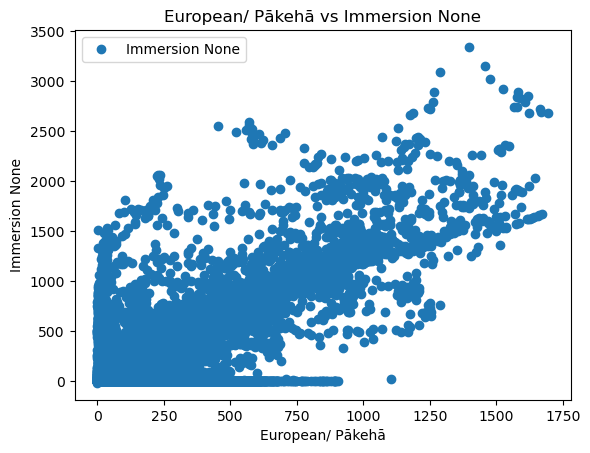

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'European/ Pākehā', y='Immersion None',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('European/ Pākehā vs Immersion None')  
plt.xlabel('European/ Pākehā')  
plt.ylabel('Immersion None')
plt.savefig(r"C:\Users\sanch\Documents\CareerFoundry\Achievement 6\3. Visualisations\scatterplot_euro_none.png")
plt.show()

**Observation:** 
The scatterplot indicates a positive association: schools with more students in None-immersion also tend to have more European/Pākehā students, with points roughly aligning along an upward-sloping regression line.

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_1 = df['European/ Pākehā'].values.reshape(-1,1)
y_1 = df['Immersion None'].values.reshape(-1,1)

In [21]:
X_1

array([[  0],
       [  0],
       [  0],
       ...,
       [535],
       [528],
       [485]])

In [22]:
y_1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [23]:
# Split data into a training set and a test set.

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

#### Regression analysis

In [24]:
# Create a regression object.

regression_1 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [25]:
# Fit the regression object onto the training set.

regression_1.fit(X_train_1, y_train_1)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted_test_1 = regression_1.predict(X_test_1)

In [27]:
# Create objects that contain the model summary statistics.

rmse_1 = mean_squared_error(y_test_1, y_predicted_test_1) # This is the mean squared error
mae_1  = mean_absolute_error(y_test_1, y_predicted_test_1)
r2_1 = r2_score(y_test_1, y_predicted_test_1) # This is the R2 score. 

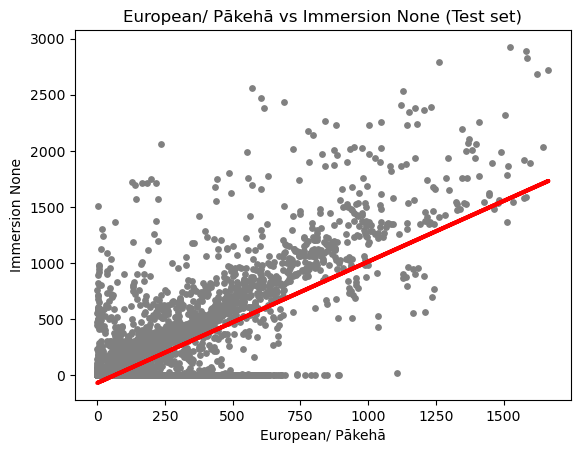

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_test_1, y_test_1, color='gray', s = 15)
plot_test_1.plot(X_test_1, y_predicted_test_1, color='red', linewidth =3)
plot_test_1.title('European/ Pākehā vs Immersion None (Test set)')
plot_test_1.xlabel('European/ Pākehā')
plot_test_1.ylabel('Immersion None')
plt.savefig(r"C:\Users\sanch\Documents\CareerFoundry\Achievement 6\3. Visualisations\scatterplot_euro_none_test.png")
plot_test_1.show()

**Observation**:
Both variables increase together, as indicated by the upward-sloping regression line, although many observations deviate noticeably from the line.

In [29]:
y_predicted_test_1

array([[-42.45702117],
       [111.2327203 ],
       [-35.96308843],
       ...,
       [-32.71612206],
       [241.11137507],
       [-33.79844418]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data_1 = pd.DataFrame({'Actual': y_test_1.flatten(), 'Predicted': y_predicted_test_1.flatten()})
data_1.head(30)

,Actual,Predicted
0,0,-42.457021
1,0,111.232720
2,0,-35.963088
3,0,-63.021142
4,16,-57.609531
5,0,106.903432
6,107,256.263885
7,0,104.738788
8,0,-26.222189
9,454,69.022158


In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('Mean absolute error: ', mae_1)
print('R2 score: ', r2_1)

Slope: [[1.08232212]]
Mean squared error:  38943.45163816426
Mean absolute error:  119.35384479028262
R2 score:  0.5506278947276976


#### Compare how the regression fits the training set

In [32]:
# Predict.

y_predicted_train_1 = regression_1.predict(X_train_1) # This is predicting X_train!

In [33]:
# Create objects that contain the model summary statistics.

rmse_2 = mean_squared_error(y_train_1, y_predicted_train_1)
mae_2  = mean_absolute_error(y_train_1, y_predicted_train_1)
r2_2 = r2_score(y_train_1, y_predicted_train_1)

In [34]:
print('Slope:' , regression_1.coef_)
print('Mean squared error: ', rmse_2)
print('Mean absolute error: ', mae_2)
print('R2 score: ', r2_2)

Slope: [[1.08232212]]
Mean squared error:  42426.93452148841
Mean absolute error:  123.21407688831708
R2 score:  0.5443246987999784


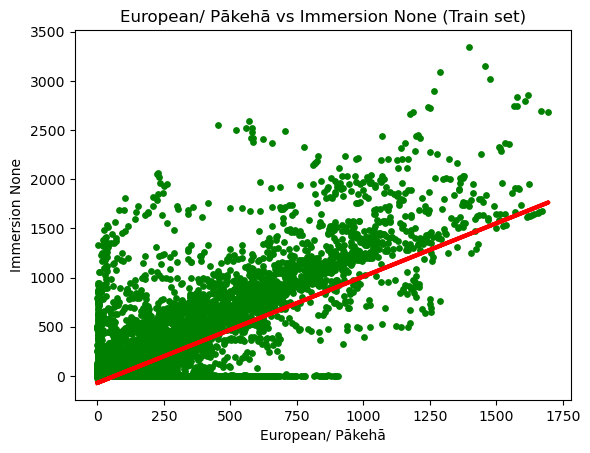

In [35]:
# Visualizing the training set results.

plot_train_1 = plt
plot_train_1.scatter(X_train_1, y_train_1, color='green', s = 15)
plot_train_1.plot(X_train_1, y_predicted_train_1, color='red', linewidth =3)
plot_train_1.title('European/ Pākehā vs Immersion None (Train set)')
plot_train_1.xlabel('European/ Pākehā')
plot_train_1.ylabel('Immersion None')
plt.savefig(r"C:\Users\sanch\Documents\CareerFoundry\Achievement 6\3. Visualisations\scatterplot_euro_none_train.png")
plot_train_1.show()

#### **Observation**:
Both variables increase together, as indicated by the upward-sloping regression line, although many observations deviate noticeably from the line.

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data_2 = pd.DataFrame({'Actual': y_train_1.flatten(), 'Predicted': y_predicted_train_1.flatten()})
data_2.head(30)

,Actual,Predicted
0,0,120.973619
1,362,14.906051
2,0,-32.716122
3,0,-31.633800
4,0,-60.856497
5,0,169.678115
6,291,186.995269
7,0,-41.374699
8,0,-69.515074
9,0,-43.539343


#### **Observation:**

R² = 0.544 → the model explains ~54% of the variance in the target on this set. That’s a moderate fit (useful signal, but plenty left unexplained).

Error shape: RMSE/MAE ≈ 1.67, suggesting some larger errors/outliers (heavier-tailed residuals).

Generalization:

Train R² = 0.544, Test R² = 0.551 → almost identical ⇒ no overfitting. If anything, the model is a touch underfit (both scores are mid-range).

Accuracy (scale):

Test MSE = 38,943 → RMSE ≈ 197.3; MAE ≈ 119.4

Train MSE = 42,427 → RMSE ≈ 206.0; MAE ≈ 123.2

Typical error is ~200 units of the target; median-ish error ~120.

Error shape:

RMSE/MAE ≈ 1.65–1.67, suggesting some larger errors/outliers (heavy-tailed residuals).

Is this “good”?

Moderate fit: explaining ~55% of variance is respectable for many real-world (education/social) datasets. 

---

### Hypothesis 2: The number of None student predicts the number of students enrolled in 'Immersion None'.

In [37]:
df['Māori'].mean() # Check the mean

np.float64(74.51580760567113)

In [38]:
df['Māori'].median() # Check the median

45.0

In [39]:
df['Māori'].max() # Check the max

879

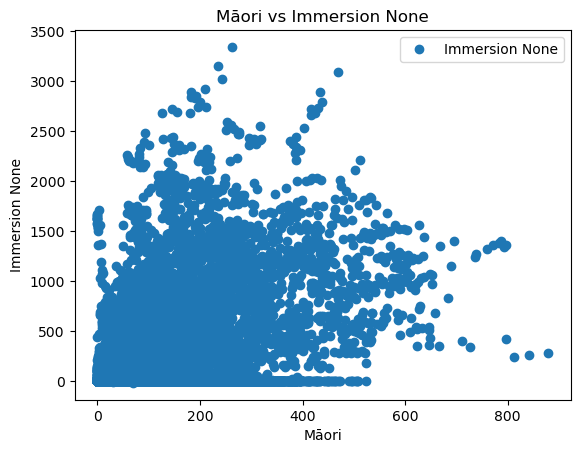

In [40]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Māori', y='Immersion None',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Māori vs Immersion None')  
plt.xlabel('Māori')  
plt.ylabel('Immersion None')
plt.savefig(r"C:\Users\sanch\Documents\CareerFoundry\Achievement 6\3. Visualisations\scatterplot_maori_none.png")
plt.show()

#### **Observation:** 
According to the scatterplot, The number of Māori students is mostly under 300, and students in Immersion None programs is mostly under 1500. There is lack a clear correlation pattern between these two variables.  

In [41]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_2 = df['Māori'].values.reshape(-1,1)
y_2 = df['Immersion None'].values.reshape(-1,1)

In [42]:
X_2

array([[ 27],
       [ 30],
       [ 26],
       ...,
       [111],
       [100],
       [ 93]])

In [43]:
y_2

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [44]:
# Split data into a training set and a test set.

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [45]:
# Create a regression object.

regression_2 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [46]:
# Fit the regression object onto the training set.

regression_2.fit(X_train_2, y_train_2)

LinearRegression()

In [47]:
# Predict the values of y using X.

y_predicted_test_2 = regression_2.predict(X_test_2)

In [48]:
# Create objects that contain the model summary statistics.

rmse_3 = mean_squared_error(y_test_2, y_predicted_test_2) # This is the mean squared error
mae_3  = mean_absolute_error(y_test_2, y_predicted_test_2)
r2_3 = r2_score(y_test_2, y_predicted_test_2) # This is the R2 score. 

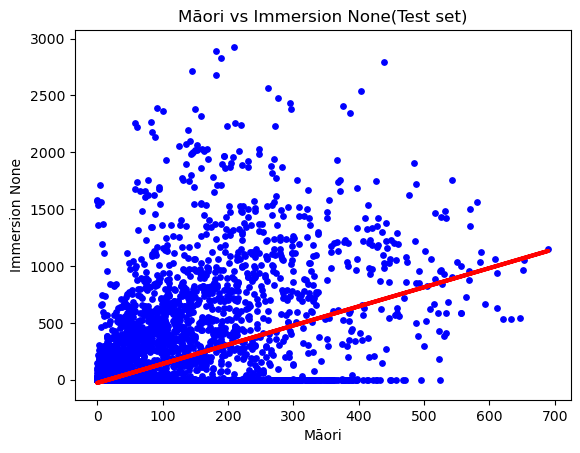

In [49]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_2 = plt
plot_test_2.scatter(X_test_2, y_test_2, color='blue', s = 15)
plot_test_2.plot(X_test_2, y_predicted_test_2, color='red', linewidth =3)
plot_test_2.title('Māori vs Immersion None(Test set)')
plot_test_2.xlabel('Māori')
plot_test_2.ylabel('Immersion None')
plt.savefig(r"C:\Users\sanch\Documents\CareerFoundry\Achievement 6\3. Visualisations\scatterplot_maori_none_test.png")
plot_test_2.show()

#### **Observation:**
In the test set, the fitted regression line is upward-sloping: schools with more students in None-immersion tend to have more Māori students. 

In [50]:
y_predicted_test_2

array([[-14.50269402],
       [148.74034666],
       [ 41.03359817],
       ...,
       [184.08162351],
       [ 66.27736735],
       [168.935362  ]])

In [51]:
# Create a dataframe comparing the actual and predicted values of y.

data_3 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_test_2.flatten()})
data_3.head(30)

,Actual,Predicted
0,0,-14.502694
1,0,148.740347
2,0,41.033598
3,0,-4.405186
4,16,-24.600202
5,0,108.350316
6,107,130.228249
7,0,-1.039350
8,0,0.643567
9,454,502.153115


In [52]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_3)
print('Mean absolute error: ', mae_3)
print('R2 score: ', r2_3)

Slope: [[1.68291795]]
Mean squared error:  69014.33134476857
Mean absolute error:  133.38582640188545
R2 score:  0.2036372210015841


In [53]:
# Create a dataframe comparing the actual and predicted values of y.

data_3 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_test_2.flatten()})
data_3.head(30)

,Actual,Predicted
0,0,-14.502694
1,0,148.740347
2,0,41.033598
3,0,-4.405186
4,16,-24.600202
5,0,108.350316
6,107,130.228249
7,0,-1.039350
8,0,0.643567
9,454,502.153115


#### Compare how the regression fits the training set

In [54]:
# Predict.

y_predicted_train_2 = regression_2.predict(X_train_2) # This is predicting X_train!

In [55]:
# Create objects that contain the model summary statistics.

rmse_4 = mean_squared_error(y_train_2, y_predicted_train_2)
mae_4  = mean_absolute_error(y_train_2, y_predicted_train_2)
r2_4 = r2_score(y_train_2, y_predicted_train_2)

In [56]:
print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_4)
print('Mean absolute error: ', mae_4)
print('R2 score: ', r2_4)

Slope: [[1.68291795]]
Mean squared error:  71658.26796607467
Mean absolute error:  134.62465393418103
R2 score:  0.23037327096128335


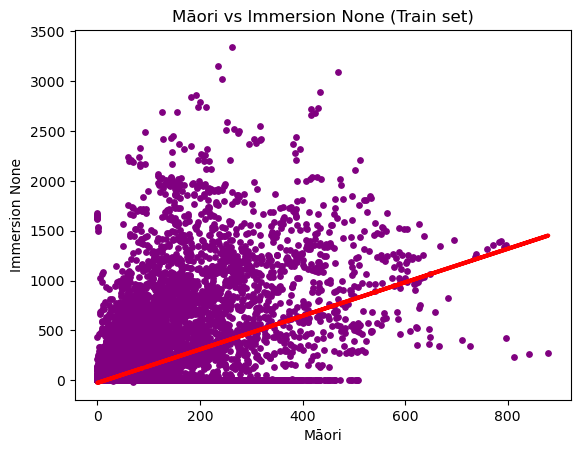

In [57]:
# Visualizing the training set results.

plot_train_2 = plt
plot_train_2.scatter(X_train_2, y_train_2, color='purple', s = 15)
plot_train_2.plot(X_train_2, y_predicted_train_2, color='red', linewidth =3)
plot_train_2.title('Māori vs Immersion None (Train set)')
plot_train_2.xlabel('Māori')
plot_train_2.ylabel('Immersion None')
plt.savefig(r"C:\Users\sanch\Documents\CareerFoundry\Achievement 6\3. Visualisations\scatterplot_maori_none_train.png")
plot_train_2.show()

**Observation:**
In the training set, the fitted regression line is also upward-sloping: schools with more students in None-immersion tend to have more Māori students. 

In [58]:
# Create a dataframe comparing the actual and predicted values of y.

data_4 = pd.DataFrame({'Actual': y_train_2.flatten(), 'Predicted': y_predicted_train_2.flatten()})
data_4.head(30)

,Actual,Predicted
0,0,136.959921
1,362,458.397249
2,0,-24.600202
3,0,487.006854
4,0,-6.088104
5,0,113.399070
6,291,99.935726
7,0,-7.771022
8,0,163.886608
9,0,69.643203


#### **Observation:**
The model explains ~20% of variance (R²≈0.20) but leaves ~80% unexplained. Paired with error metrics (e.g., MAE/RMSE), this indicates limited predictive utility for decision-making.

#### **Data bias:**
School-size (exposure) bias: Both variables are counts and scale with Total Roll. This can create a spurious positive trend and inflate correlations, overstating association strength.
Temporal/policy shifts: Changes across years (e.g., curriculum, staffing, roll fluctuations) can alter relationships. Pooling years without controls may blur signals.
Confounding & composition: Urbanicity, region, school type, and socioeconomic context (decile/EQI) may drive both ethnicity mix and immersion uptake—masking/creating associations (Simpson’s paradox risk).